# Objective:
The objective of this assignment is to build a predictive model that can predict customer churn for a given company. The intern will use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.

The investment and portfolio department of the Bank of Portugal would want to be able to identify their customers who potentially would subscribe to their term deposits. As there has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, the goal of your employer is to find a model that can predict which future clients who would subscribe to their term deposit.

Obtain a dataset of customer information, including demographic information, customer behavior, and whether or not the customer has churned.
Perform data cleaning and preprocessing on the dataset, including handling missing data and converting categorical variables to numerical variables.
Explore the data and perform feature selection to select the relevant features that will be used in the model.
Build a predictive model using machine learning algorithms such as Logistic Regression, Random Forest, or Gradient Boosting.
Train the model using a portion of the data and use the remaining data to evaluate the performance of the model.
Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score and AUC-ROC.
Fine-tune the model by trying different parameters or techniques to improve performance.
Create a report detailing the process and results, including the feature selection process, the model used, the evaluation metrics, and the performance of the final model.
Provide a brief on the limitation of the model and the possible future work.
Using appropriate techniques for handling imbalanced datasets if the data is imbalanced, and I also made sure to follow best practices for avoiding overfitting, such as using techniques like cross-validation.

Churn analysis is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it. In fact, acquiring new customers is considerably more expensive than maintaining and upgrading existing customer relationships. The more customers you churn, the more money you must spend to recoup the loss of business by finding new ones. Therefore, companies nowadays are more concerned than past and want to identify the causes of churn and implement effective strategies for retaining their customers.

In this Exploratory Data Analysis (EDA) and and a variety of Model Classifications including Logistic Regression (LR), Support Vector Machine (SVM), AdaBoosting (AB), GradientBoosting (GB), K-Nearest Neighbors (KNN), Random Forest (RF), Desicion Tree (DT), XGBoost (XGB).

In [2]:
#Import the Necessary Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("E:/projects/uniacco Predictive Modeling for Customer Churn/bank-marketing-uci/bank.csv")
df.head(5)

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

### Context
In the given study, we have a classification problem.

We will try to create classifications on the target variable in the given dataset. The Target variable in the given dataset is "y" To make the best classification possible on the target variable, we will focus on if the target variable is balanced or not.  The target variable in this study is an imblanced data so this researcher will concentrate Recall score on evaluating the results rather than Accuracy score used in the evaluation of balanced data. Lastly we will build a variety of Classification models and compare the models giving the best prediction on Churn.

In [4]:
print("There are", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There are 4521 observation and 17 columns in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe().T.style.background_gradient(cmap='RdPu')

In [7]:
df.describe(include=object).T

count unique         top  freq
job        4521     12  management   969
marital    4521      3     married  2797
education  4521      4   secondary  2306
default    4521      2          no  4445
housing    4521      2         yes  2559
loan       4521      2          no  3830
contact    4521      3    cellular  2896
month      4521     12         may  1398
poutcome   4521      4     unknown  3705
y          4521      2          no  4000

In [8]:
df.columns = df.columns.str.strip()

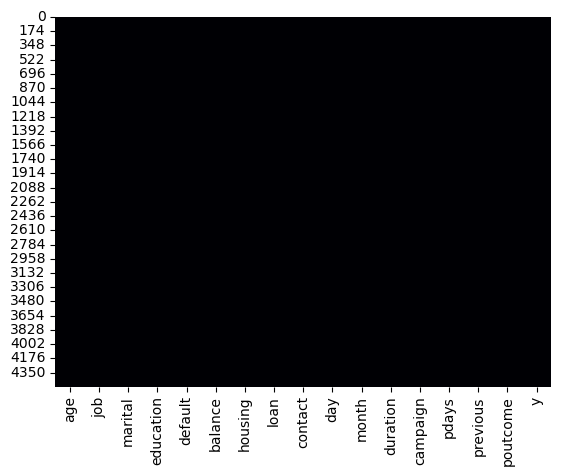

In [9]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

No null values present in the data!

In [10]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The dataset has too many features with text data and are probably categorical features!

we will rename y as churn

In [12]:
df.rename(columns = {'y':'churn'},inplace = True)

In [13]:
for col in df.columns:
    print('{}.{}'.format(col,df[col].unique()))

age.[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
job.['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital.['married' 'single' 'divorced']
education.['primary' 'secondary' 'tertiary' 'unknown']
default.['no' 'yes']
balance.[ 1787  4789  1350 ...  -333 -3313  1137]
housing.['no' 'yes']
loan.['no' 'yes']
contact.['cellular' 'unknown' 'telephone']
day.[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month.['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
duration.[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97  132  765   

Let's divide the features into numerical and categorical features.
We will also execute the label encoding transformation for categorical features.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
job  :  [10  7  4  1  6  9  2  0  8  3  5 11]  =  ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital  :  [1 2 0]  =  ['married' 'single' 'divorced']
education  :  [0 1 2 3]  =  ['primary' 'secondary' 'tertiary' 'unknown']
default  :  [0 1]  =  ['no' 'yes']
housing  :  [0 1]  =  ['no' 'yes']
loan  :  [0 1]  =  ['no' 'yes']
contact  :  [0 2 1]  =  ['cellular' 'unknown' 'telephone']
month  :  [10  8  0  6  3  1  4  5  9 11  7  2]  =  ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome  :  [3 0 1 2]  =  ['unknown' 'failure' 'other' 'success']
churn  :  [0 1]  =  ['no' 'yes']


We creating a deep copy of the orginal dataset and label encoding the text data.
Modifications in the original dataset will not be highlighted in this deep copy.
Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
We now again the descriptive stats of the data.

In [15]:
df1.describe()

age     job  marital  education  default  balance  housing    loan  \
count 4521.00 4521.00  4521.00    4521.00  4521.00  4521.00  4521.00 4521.00   
mean    41.17    4.41     1.15       1.23     0.02  1422.66     0.57    0.15   
std     10.58    3.26     0.60       0.75     0.13  3009.64     0.50    0.36   
min     19.00    0.00     0.00       0.00     0.00 -3313.00     0.00    0.00   
25%     33.00    1.00     1.00       1.00     0.00    69.00     0.00    0.00   
50%     39.00    4.00     1.00       1.00     0.00   444.00     1.00    0.00   
75%     49.00    7.00     2.00       2.00     0.00  1480.00     1.00    0.00   
max     87.00   11.00     2.00       3.00     1.00 71188.00     1.00    1.00   

       contact     day   month  duration  campaign   pdays  previous  \
count  4521.00 4521.00 4521.00   4521.00   4521.00 4521.00   4521.00   
mean      0.65   15.92    5.54    263.96      2.79   39.77      0.54   
std       0.90    8.25    3.00    259.86      3.11  100.12      1.69   
min       0.00    1.00    0.00      4.00      1.00   -1.00      0.00   
25%       0.00    9.00    3.00    104.00      1.00   -1.00      0.00   
50%       0.00   16.00    6.00    185.00      2.00   -1.00      0.00   
75%       2.00   21.00    8.00    329.00      3.00   -1.00      0.00   
max       2.00   31.00   11.00   3025.00     50.00  871.00     25.00   

       poutcome   churn  
count   4521.00 4521.00  
mean       2.56    0.12  
std        0.99    0.32  
min        0.00    0.00  
25%        3.00    0.00  
50%        3.00    0.00  
75%        3.00    0.00  
max        3.00    1.00

# EXPLORATORY DATA ANALYSIS¶
Exploratory data analysis is usually the initial process of every data science project. It is usually critical to perform an initial investigation on data to identify patterns, outliers, imbalances and to test a prior hypothesis. Summary statistics and visualization are mainly used to perform exploratory data analysis.

Before performing Supervised Classification Algorithms, We need to know the data well in order to label the observations correctly. We need to analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. We will to apply data visualization techniques.

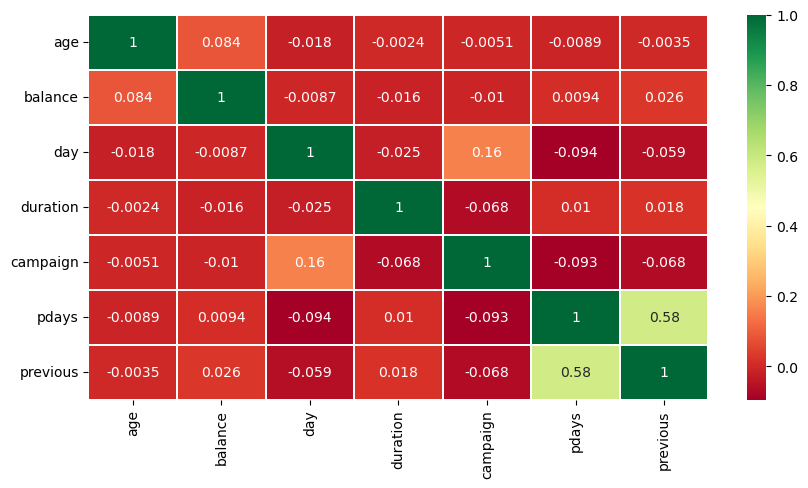

In [16]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

It is a huge matrix with too many features. We will check the correlation only with respect to Churn.

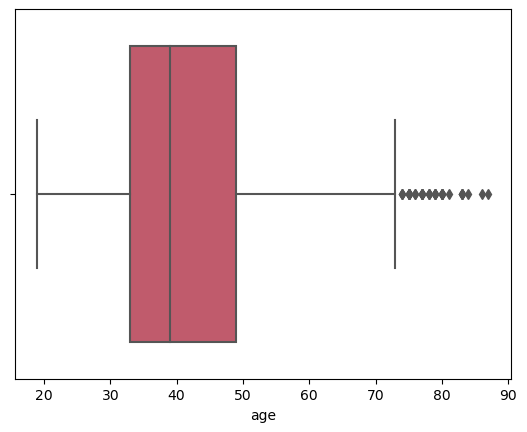

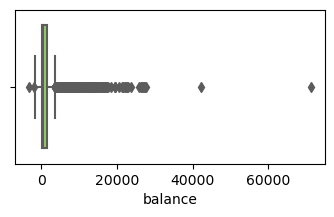

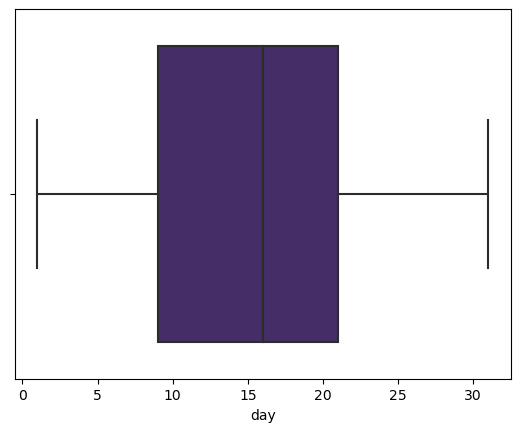

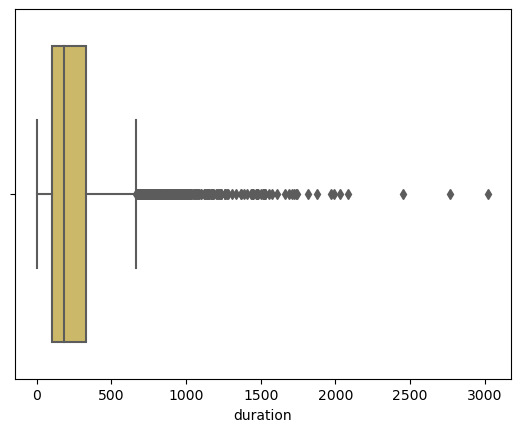

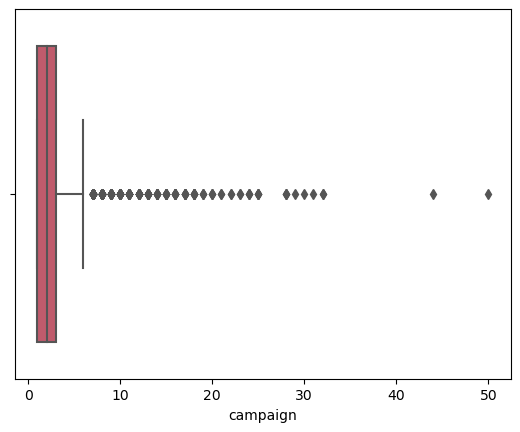

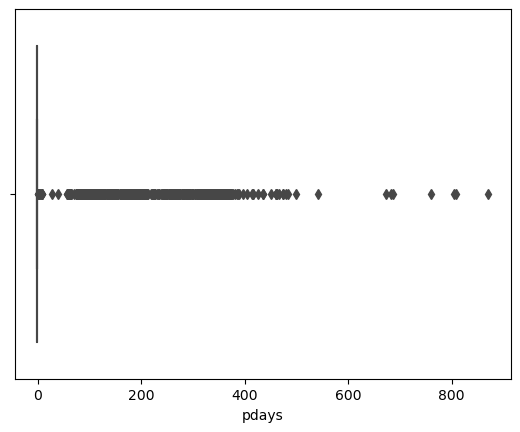

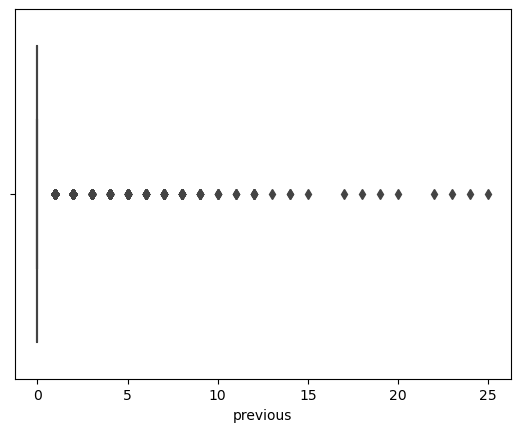

In [17]:
plt.figure(figsize=(4,2))
clr = ['#d14a61','#91db57','#432371','#dbc257','#d14a61', '#b13c6c','#50b131', '#db5f57']
df2 = df.select_dtypes([np.int])
for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.boxplot(df2[col],color = clr[i])

In [18]:
# form the cross tab for categorical variable
#df['loan'],df['contact']
pd.crosstab(df['churn'], [df['marital'],df['education'],df['default']], rownames=['deposit'], colnames=['marital','education','default']).T.style.background_gradient(cmap='RdPu')

In [19]:
# form the cross tab for categorical variable
#,df['default'],df['job'],df['housing'],df['loan'],df['contact'],df['month'],df['poutcome']
pd.crosstab(df['churn'], [df['month'],df['housing']], rownames=['deposit'], colnames=['month','housing']).T.style.background_gradient(cmap='RdPu')

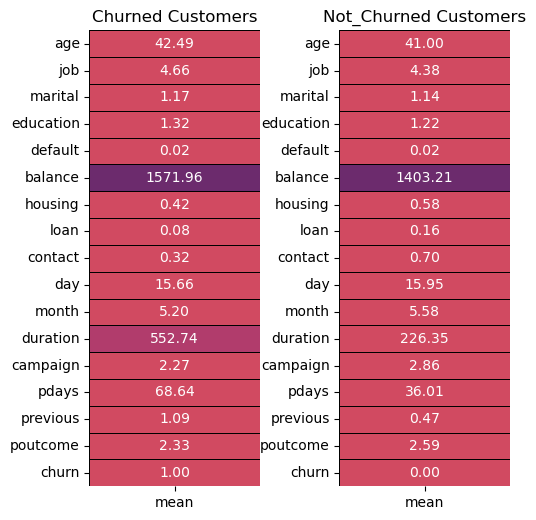

In [20]:
colors = ['#d14a61', '#b13c6c', '#dbc257', '#6c2b6d']

churn = df1[df1['churn'] == 1].describe().T
not_churn = df1[df1['churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

Mean values of all the features for churned and not-churned customers.

Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.

Mean values of job,education ,pdays ,money spent on previous campaign  are higher for churned customers than non-churned customers. This can serve as a good indicator or point to focus on!

Churned customer's balance value is slighlty larger than those of not-churned customers.

number of days that passed by after the client was last contacted from a previous campaign of the churn customers,68.64, is much more than that of not-churn customers,36.01 .

last contact duration of the churn customers,552.74, is much more than that of not-churn customers,226.35.

From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.

The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.
We will now move on to the EDA section and look into the features with more detail!

In [21]:
#Dividing features into Numerical and Categorical :
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : marital education default housing loan contact poutcome churn
Numerical Features : age job balance day month duration campaign pdays previous


Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

For this dataset, as the number of features are less, we can manually check the dataset as well.

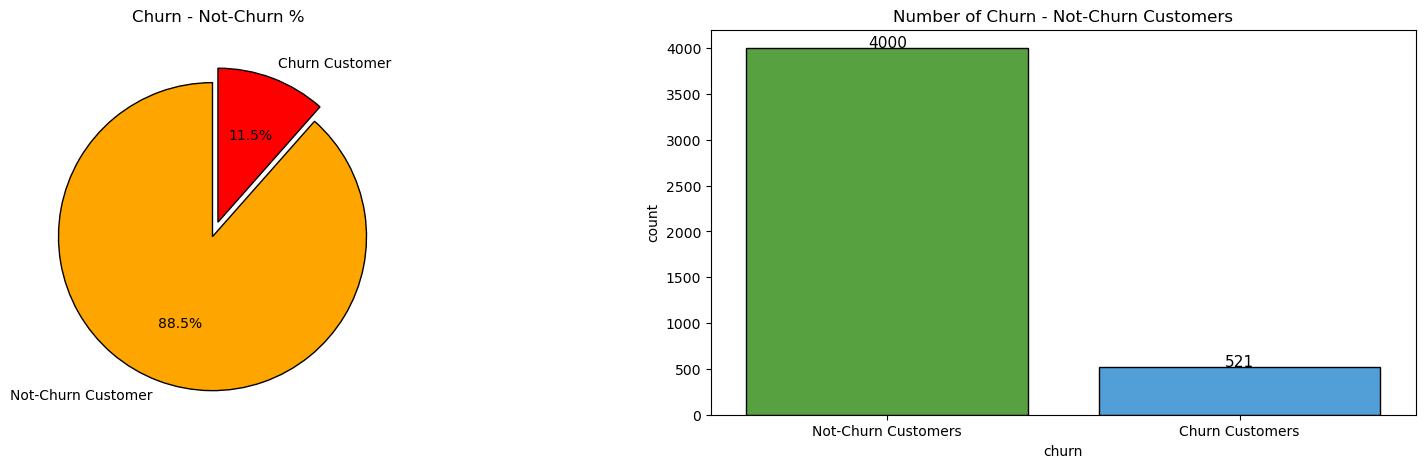

In [22]:
#Target Variable Visualization (Churn) :
l = list(df1['churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = ["orange","red"],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('churn',data = df1,palette =  ['#50b131','#3ba3ec'],edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

The dataset is unbalanced in a near about 88:11 ratio for Not-Churn : Churn customers!
Due to this, predictions will be biased towards Not-Churn customers.
Visualizations will also display this bias!

In [23]:
#Categorical Features vs Target Variable (Churn):
#We will remove Churn, target variable, from the categorical features list for data visualization.
categorical_features.remove('churn')

In [24]:
l1 = ['marital','age','education','contact'] # Personal Information
l2 = ['default','housing','loan','poutcome'] # account details and outcomes!
l3 = ['day','month','duration'] # last contact duration
l4 = ['campaign','pdays','previous']  #time spent on campaigns before and after

We have too many categorical features in this dataset!
We divide them into 4 groups depending on their values or based on the column name!

### Group 1 :Personal Information

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


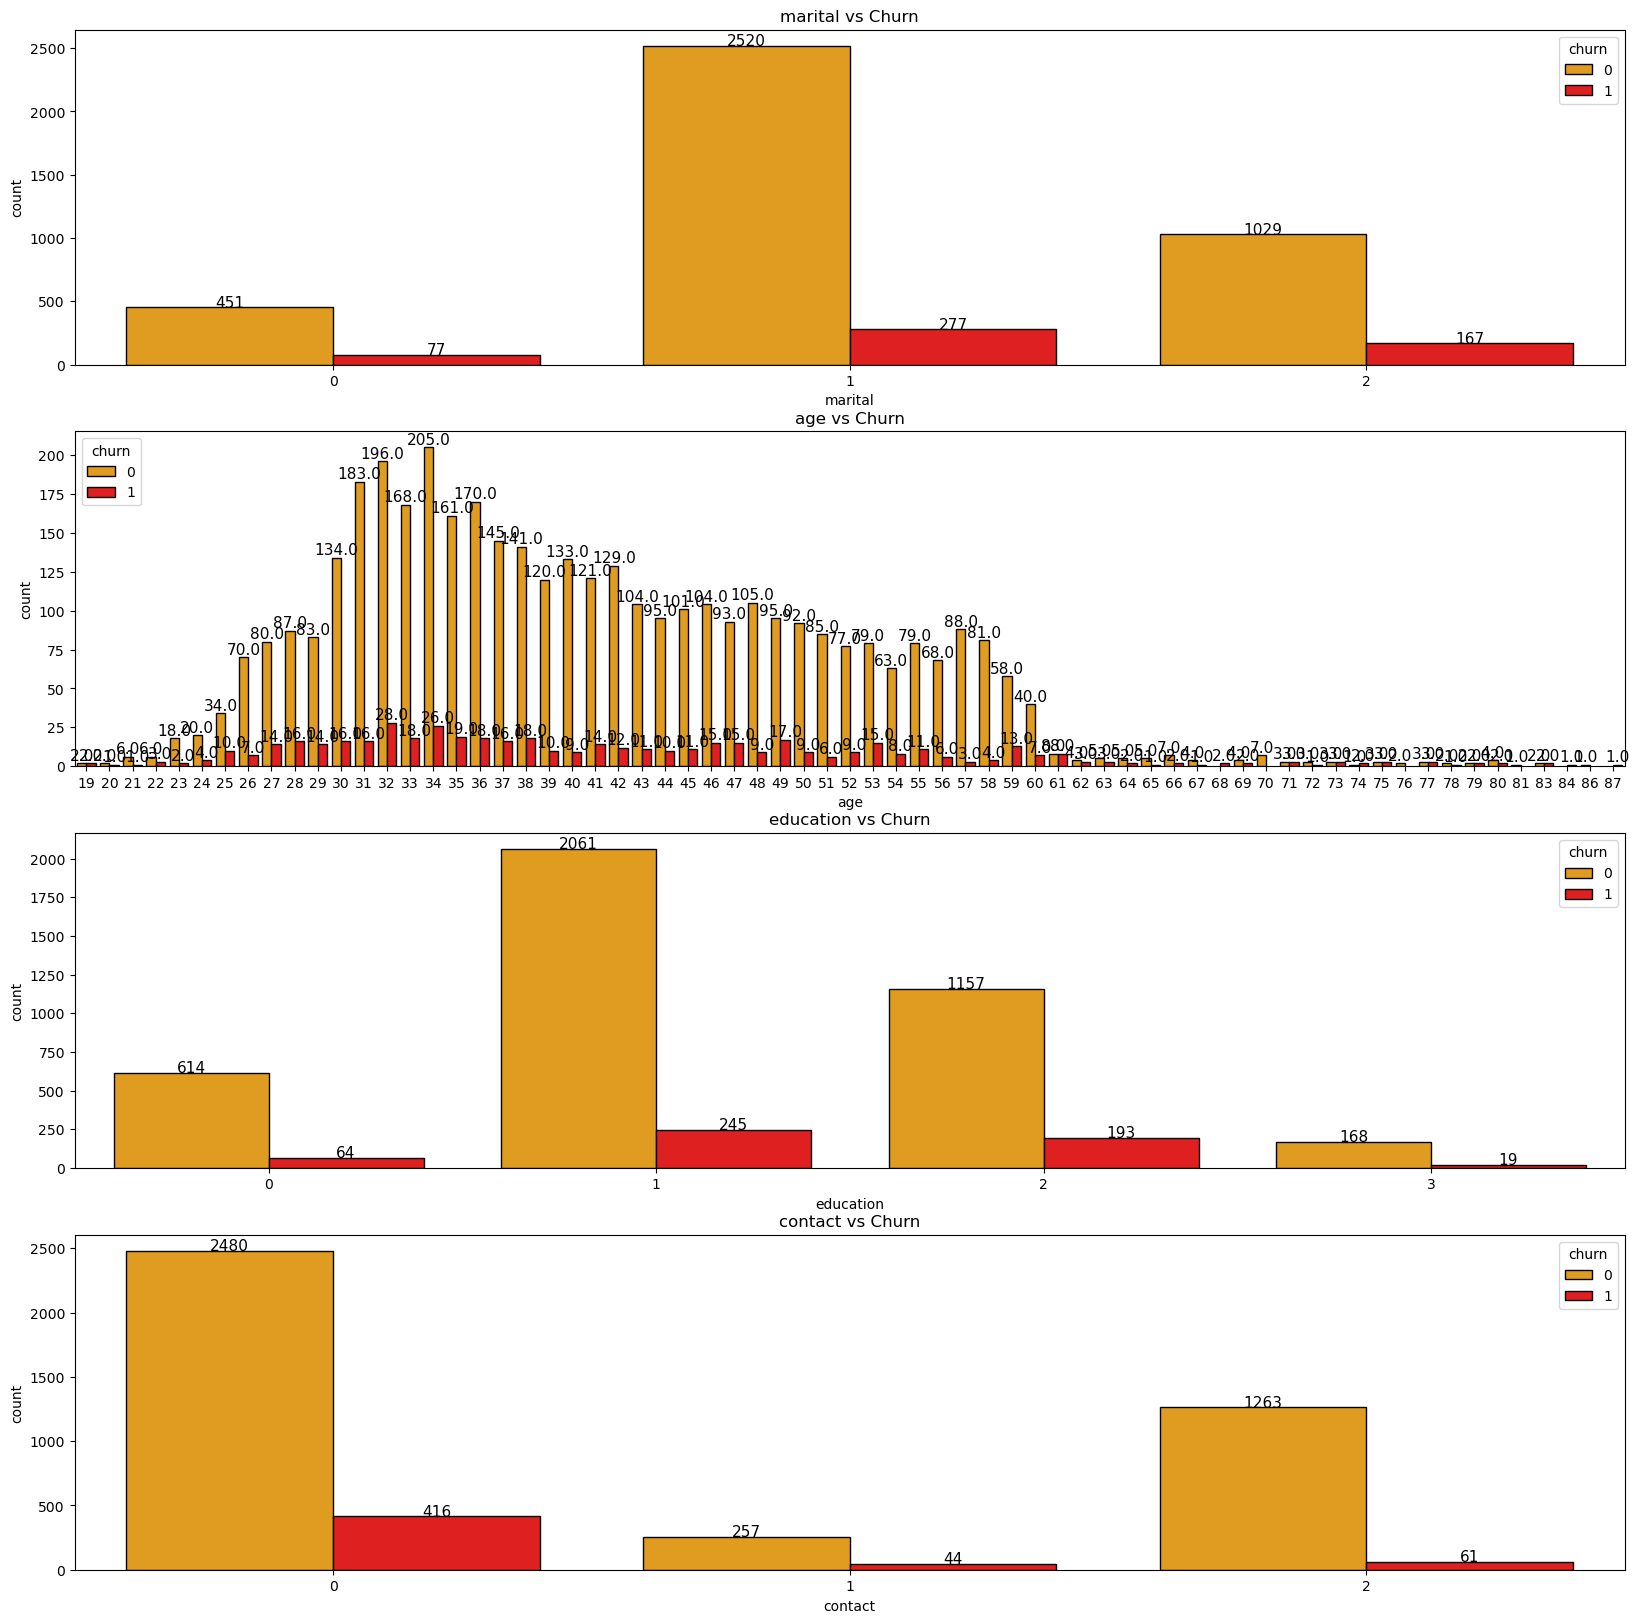

In [25]:
colors = ["orange","red",'#50b131','#3ba3ec']
fig = plt.subplots(nrows = 4,ncols = 1,figsize = (20,20))
for i in range(len(l1)):
    plt.subplot(4,1,i+1)
    ax = sns.countplot(l1[i],data = df1,hue = "churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

MAjoirty of Customer churning and non churning are married ,followed by singles.

Similarly, MAjoirty of Customer churning and non churning have secondary education ,people with undefined level of education have the least customers. 

churning customers between age of 31-36 have the highest number.Highest 205 customers at age of 34 

Customers who use telephone type of contact are churned less as compared to those using a cellular type of contact.

### Group 2:  # account details and outcomes! :

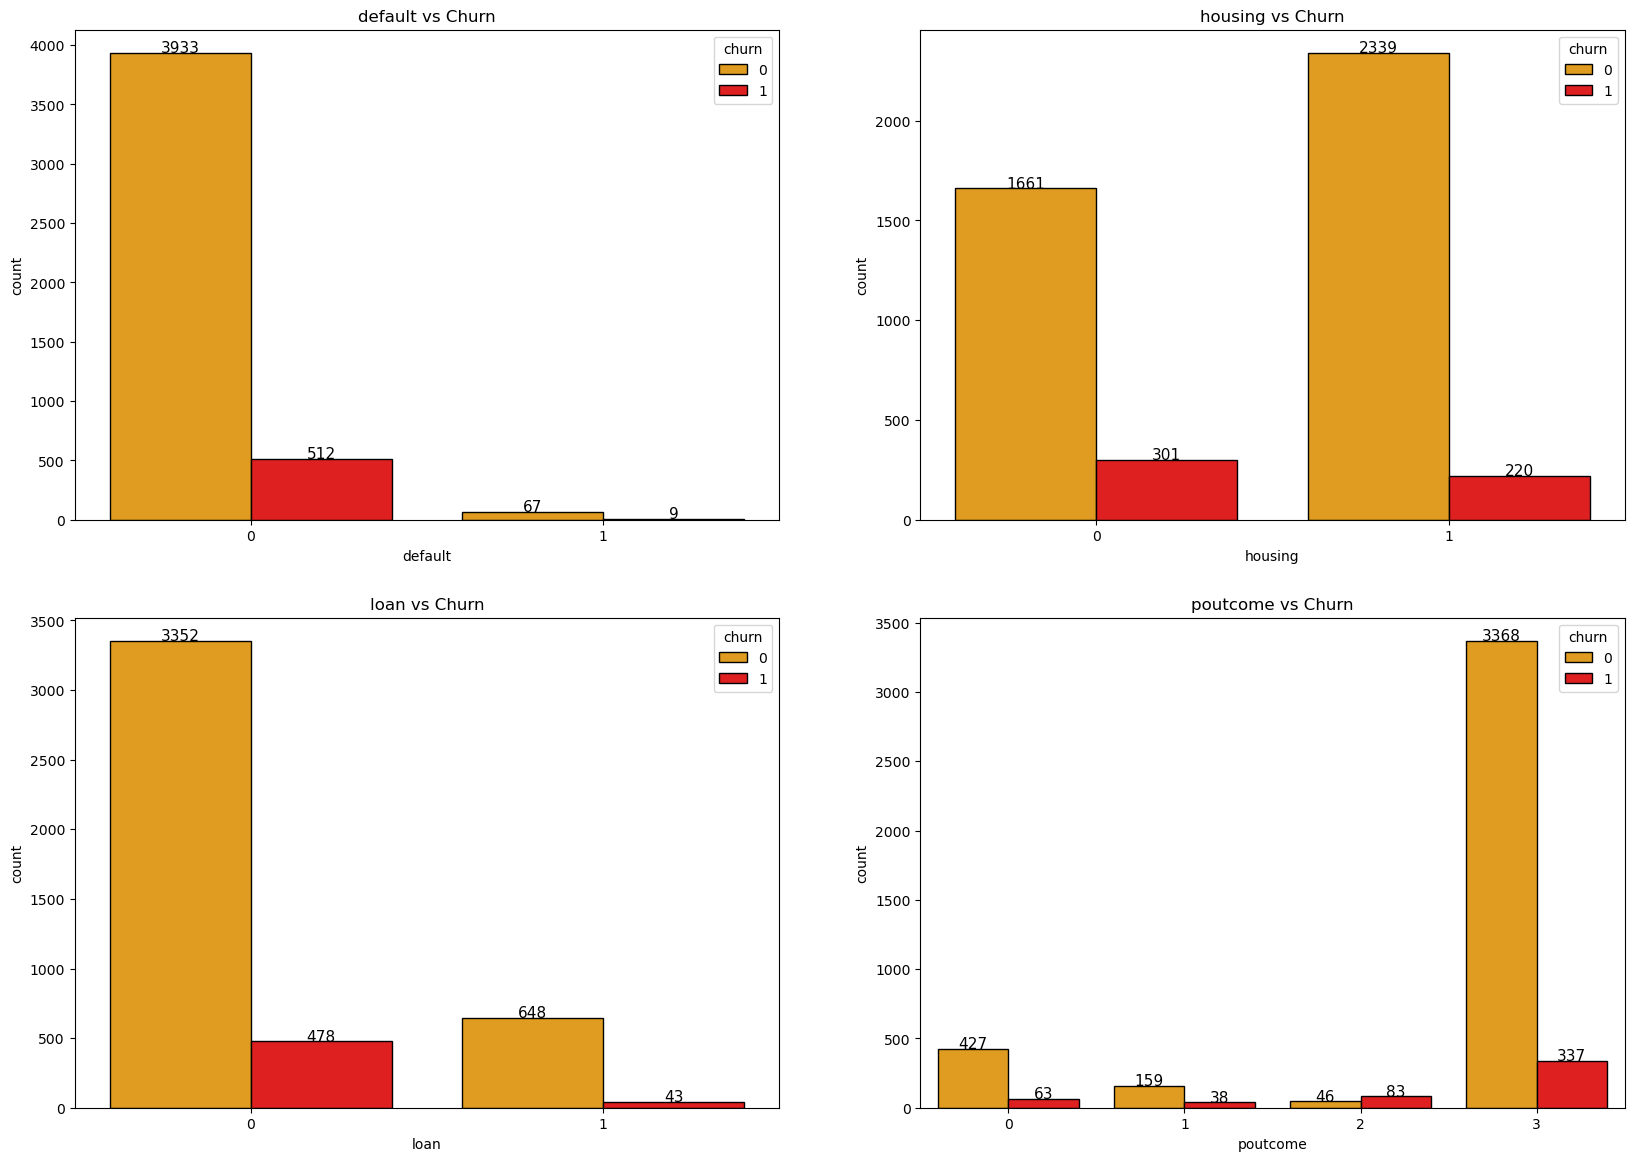

In [26]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = df1,hue = "churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

3933 non churning customers dont have credit in default,oppose to 512 churning customers.
67 no churning customers have credit in default,oppose to 43 churning customers.

A high number of 2339 non churning customers haves housing loan,oppose to 1661 non churning customers who do not have a house loan. whereas number of churning customers differs approximately by a 100 between not having a house loan and having a house loan.
churning customers have had 427 failures ,whereas non churning customers had 63
Count of success is much less.non churning customers are more successfull than churning customrs.

churning customers have higher number of loans(648) than non churning customers(43).


## Feature Engineering

### Data Scaling :

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization



Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.
Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.
Standardization : None of the features are standardized for the above data.

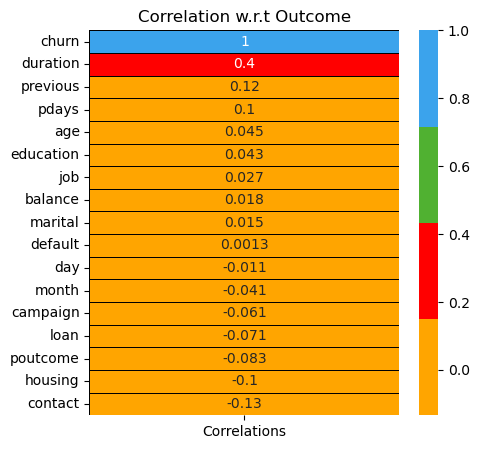

In [28]:
corr = df1.corrwith(df1['churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

### Feature Selection for Categorical Features :

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

### Chi-Squared Test :

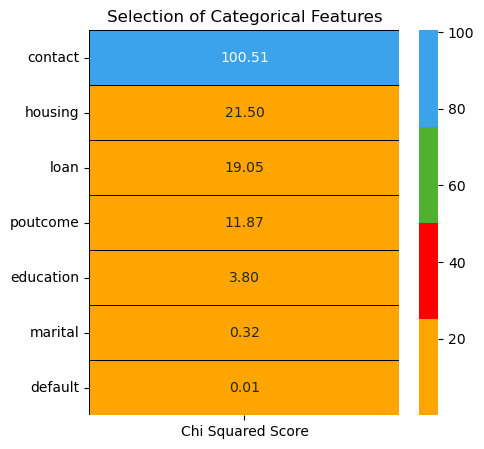

In [30]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [31]:
#marital and default have very low chi squared score

### Feature Selection for Numerical Features : ANOVA Test :

In [32]:
from sklearn.feature_selection import f_classif

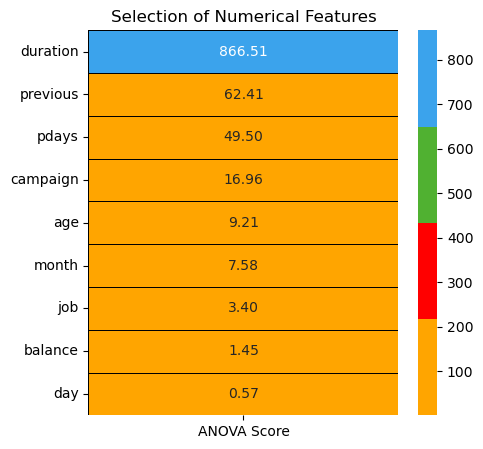

In [33]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
From the above results, we need to include all the numerical features for modeling.

In [34]:
df1.drop(columns = ['education', 'marital','default'],inplace = True)
df1.head()

age  job  balance  housing  loan  contact  day  month  duration  campaign  \
0   30   10     1787        0     0        0   19     10        79         1   
1   33    7     4789        1     1        0   11      8       220         1   
2   35    4     1350        1     0        0   16      0       185         1   
3   30    4     1476        1     1        2    3      6       199         4   
4   59    1        0        1     0        2    5      8       226         1   

   pdays  previous  poutcome  churn  
0     -1         0         3      0  
1    339         4         0      0  
2    330         1         0      0  
3     -1         0         3      0  
4     -1         0         3      0

data balancing!

Data Balancing using SMOTE :
In order to cope with unbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.
Oversampling : Increase the minority samples of the target variable to the majority samples.
After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!
For data balancing, we will use imblearn.
pip statement : pip install imbalanced-learn

In [35]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [36]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4000, 1: 4000})

# Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [38]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.25, random_state = 2)

In [39]:
# Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [40]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## 1] Xgboost Classifier :

In [41]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)


Cross Validation Score :  95.53%
ROC_AUC Score :  87.42%


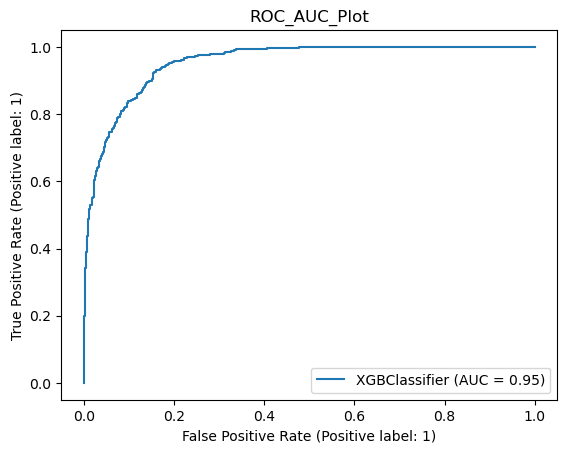

In [42]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       987
           1       0.86      0.90      0.88      1013

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



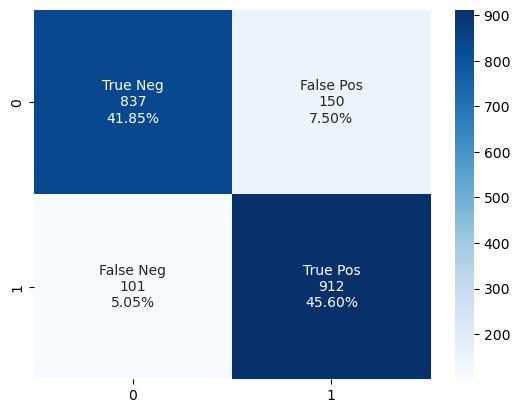

In [43]:
model_evaluation(classifier_xgb,x_test,y_test)

## 2] LightGBM Classifier :

In [44]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  95.53%
ROC_AUC Score :  87.81%


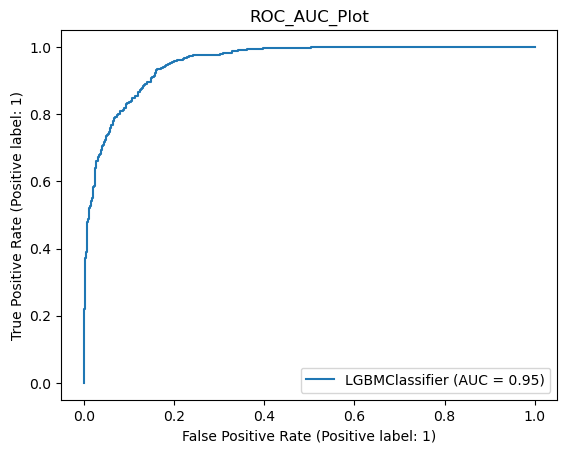

In [45]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       987
           1       0.86      0.91      0.88      1013

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



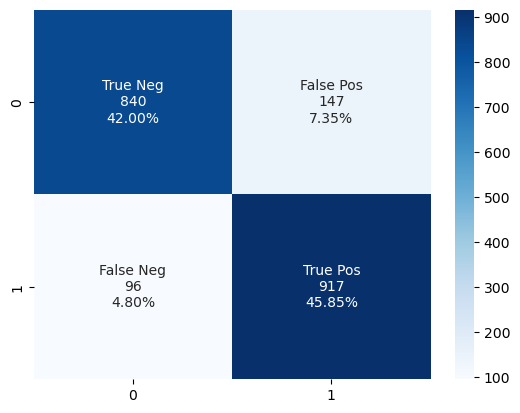

In [46]:
model_evaluation(classifier_lgbm,x_test,y_test)

## 3] Random Forest Classifier : 


In [47]:
from sklearn.ensemble import RandomForestClassifier

Cross Validation Score :  93.36%
ROC_AUC Score :  85.07%


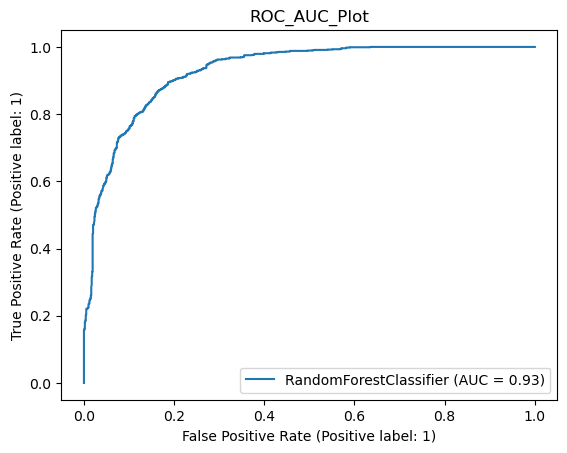

In [48]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       987
           1       0.84      0.88      0.86      1013

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



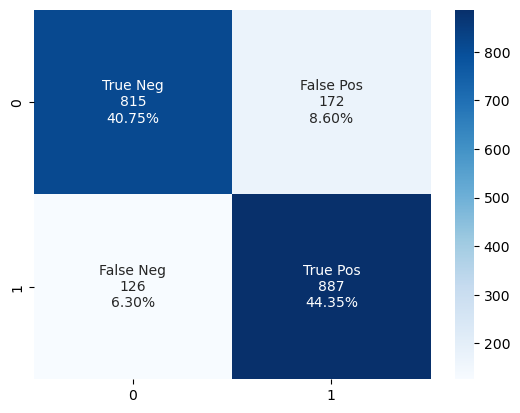

In [49]:
model_evaluation(classifier_rf,x_test,y_test)

## 4] Decision Tree Classifier :

Cross Validation Score :  88.36%
ROC_AUC Score :  81.92%


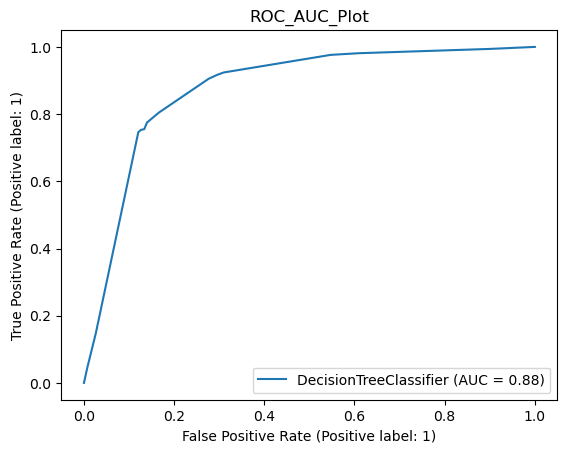

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       987
           1       0.83      0.80      0.82      1013

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



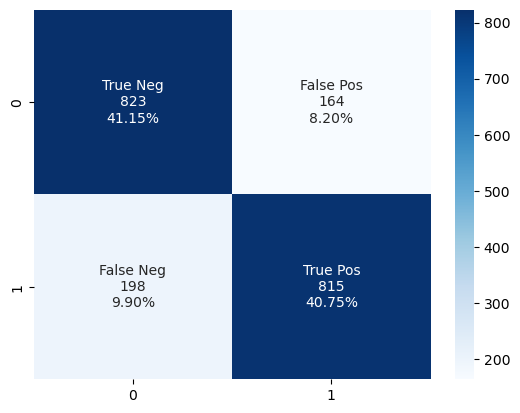

In [51]:
model_evaluation(classifier_dt,x_test,y_test)

## 5] Logistics Regression :

Cross Validation Score :  87.37%
ROC_AUC Score :  80.13%


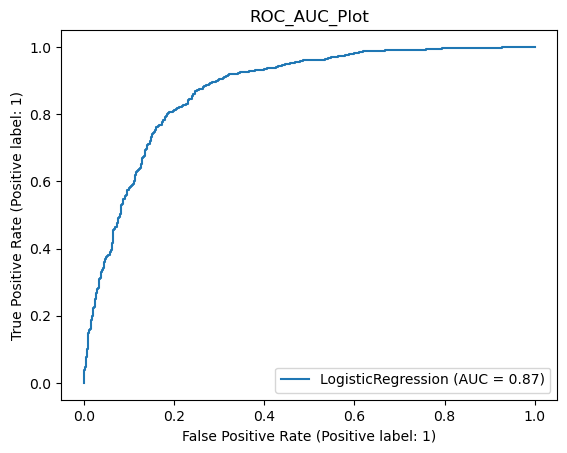

In [52]:
logreg = LogisticRegression()
model(logreg,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       987
           1       0.82      0.78      0.80      1013

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



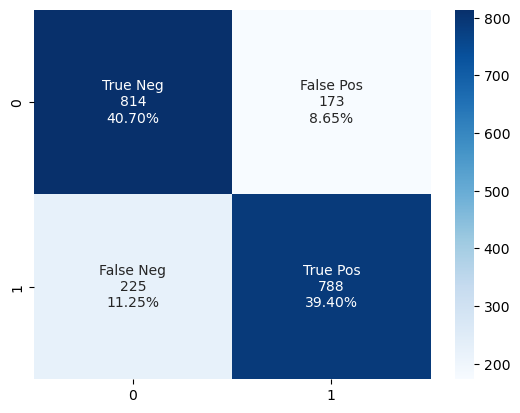

In [53]:
model_evaluation(logreg,x_test,y_test)

## 6] MLPClassifier() :

In [54]:
mlp = MLPClassifier()

Cross Validation Score :  89.28%
ROC_AUC Score :  82.10%


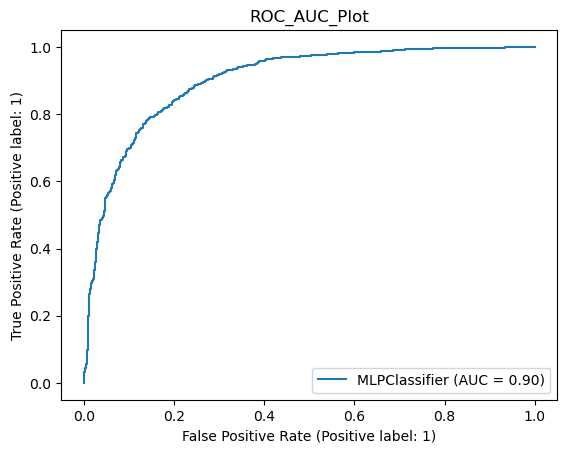

In [55]:
model(mlp,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.80      0.86      0.82       987
           1       0.85      0.78      0.82      1013

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



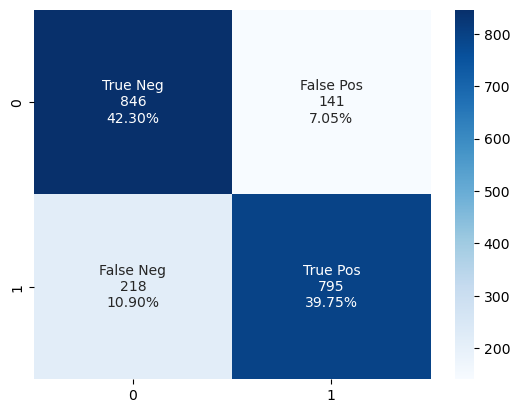

In [56]:
model_evaluation(mlp,x_test,y_test)

# Conclusion
This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniues.
Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop of  improvement.

SMOTE analysis is used for data balancing. Combinations of undersampling and oversampling can be employed as well.

When it comes to model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detection could also bump up the F1 Score (Churn) & Cross Validation Score. Xgboost and LightGBM Classifier have highest F1 score (Churn).

In [ ]:
#